In [121]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
import imutils
import qrcode
#from pyzbar.pyzbar import decode
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()   #노트북 업데이트 (내부함수)


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

OSError: [WinError 126] 지정된 모듈을 찾을 수 없습니다

In [3]:
pip install imutils
pip install qrcode
pip install pyzbar

  Created wheel for imutils: filename=imutils-0.5.3-cp37-none-any.whl size=25853 sha256=c3beaee625f09bbc9d6ec825fe20867f56612b9ec8adb3a64bab0610da7b7173
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\16\84\1f\bf88641293cda2c8be81a5c4b8ca973dd9125a6dc3767417fd
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


# Corner
## Harris Corner Detection

cv2.cornerHarris(img, block size, sobel size, k value)  
* 보통은 gray img 사용 (not edge)
* block=주변정보크기 클수록 코너점 줄어듦
* k값=가중치. k 작을수록 코너점 많아짐. k=0.04~0.06
* R=Det() - kTr() : 반환값(float32) : 코너일 확률값  
  
Normalize) 흰색 포인트가 코너포인트.

float32
(600, 868)


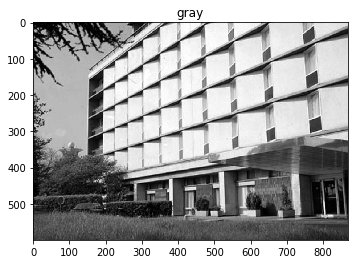

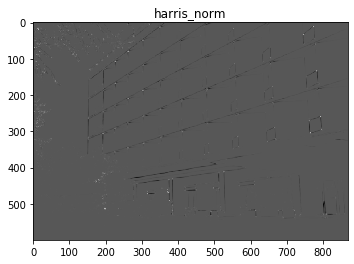

uint8


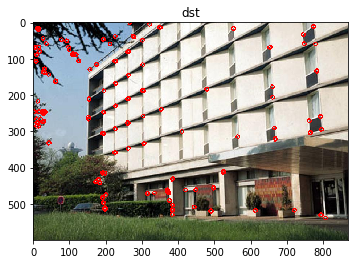

In [26]:
src = cv2.imread('../img/building.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#  block 크기, 소벨크기,         R=Det() - kTr()
harris = cv2.cornerHarris(gray, 3, 3, 0.04)  # R값 반환
print(harris.dtype)
print(harris.shape) #2차원
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
#min~max 구간으로 scsaling하는 함수


dst = src.copy()

for y in range(harris_norm.shape[0]):              #행렬이니까 y먼저->x
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)  #원점,반지름,색,두께

imshow('gray', gray)
imshow('harris_norm', harris_norm)
print(harris_norm.dtype)  #uint8 : numpy type. (파이썬에는 uint8 없음)
imshow('dst', dst)

float32
(600, 868)
-0.005183762
0.010007294


(array([8.70000e+01, 4.70000e+02, 7.58900e+03, 5.10984e+05, 1.43100e+03,
        1.69000e+02, 5.10000e+01, 1.30000e+01, 4.00000e+00, 2.00000e+00]),
 array([-0.00518376, -0.00366466, -0.00214555, -0.00062645,  0.00089266,
         0.00241177,  0.00393087,  0.00544998,  0.00696908,  0.00848819,
         0.01000729], dtype=float32),
 <a list of 10 Patch objects>)

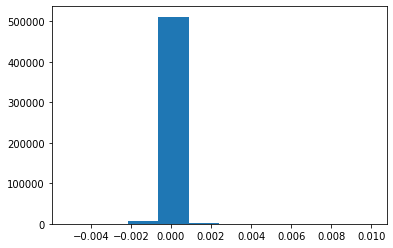

In [19]:
src = cv2.imread('../img/building.jpg', cv2.IMREAD_GRAYSCALE)

# 보통은 gray img 사용 (not edge)
# block=주변정보크기 클수록 코너점 줄어듦
# k값=가중치. k 작을수록 코너점 많아짐
#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris = cv2.cornerHarris(src, 3, 3, 0.04)  # R값 반환(float32)
print(harris.dtype)
print(harris.shape) #2차원

print(np.min(harris))
print(np.max(harris))

plt.hist(harris.ravel())

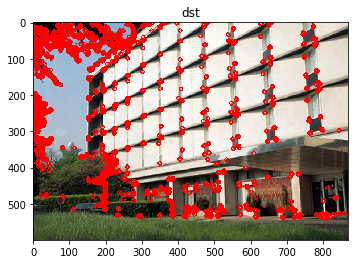

In [27]:
for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 90:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('dst', dst)

float32
(600, 868)


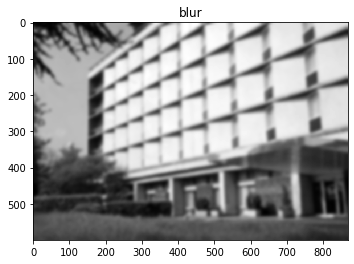

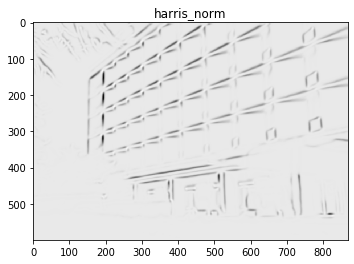

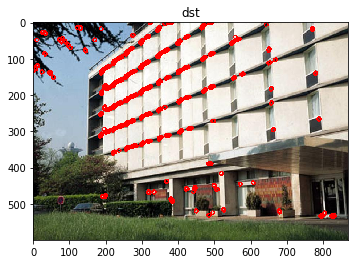

In [65]:
src = cv2.imread('../img/building.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(25,25),0)

harris = cv2.cornerHarris(blur, 3, 3, 0.04)
print(harris.dtype)
print(harris.shape) #2차원
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
#min~max 구간으로 scsaling하는 함수


dst = src.copy()

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 235:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('blur', blur)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

### 실습 - corner

float32
(490, 686)


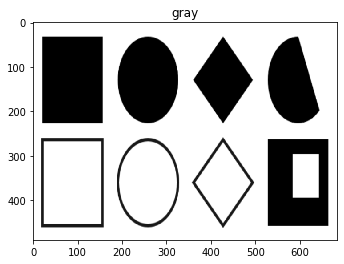

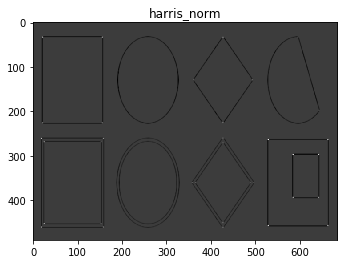

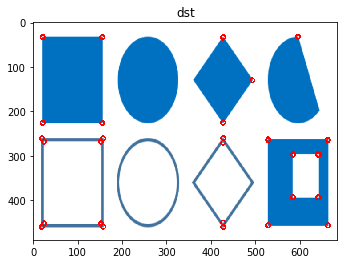

In [30]:
src = cv2.imread('../img/corner.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

harris = cv2.cornerHarris(gray, 3, 3, 0.04)
print(harris.dtype)
print(harris.shape) #2차원
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
#min~max 구간으로 scsaling하는 함수


dst = src.copy()

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('gray', gray)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

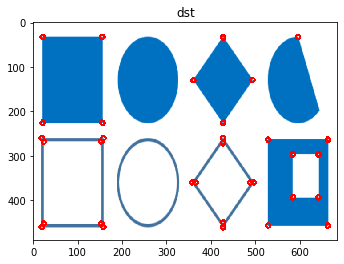

In [29]:
for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 70:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('dst', dst)

float32
(490, 686)


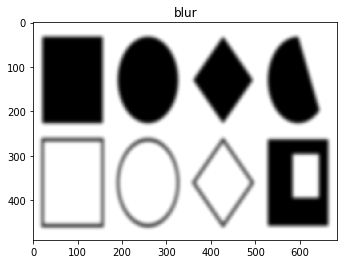

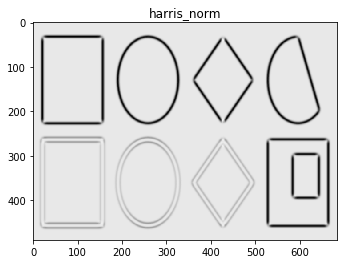

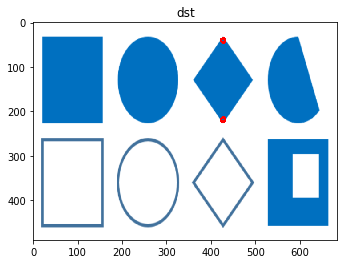

In [61]:
src = cv2.imread('../img/corner.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(25,25),0)

harris = cv2.cornerHarris(blur, 3, 3, 0.04)
print(harris.dtype)
print(harris.shape) #2차원
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
#min~max 구간으로 scsaling하는 함수


dst = src.copy()

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 240:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('blur', blur)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

### 실습 - checkboard

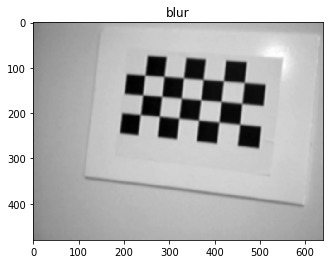

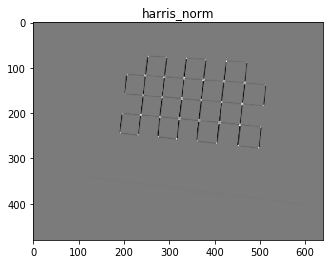

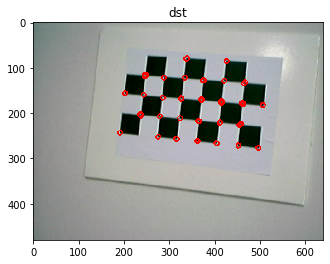

In [47]:
src = cv2.imread('../img/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

harris = cv2.cornerHarris(gray, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
#min~max 구간으로 scsaling하는 함수


dst = src.copy()

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 200:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('blur', blur)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

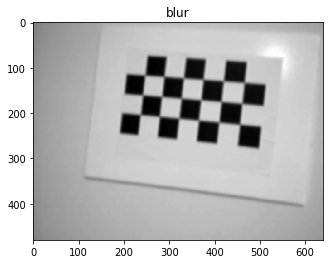

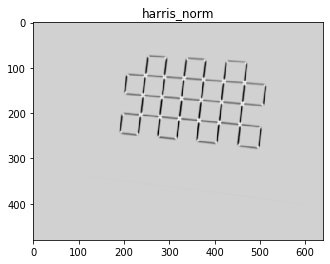

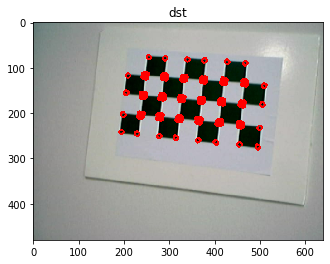

In [52]:
src = cv2.imread('../img/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(15,15),0)

harris = cv2.cornerHarris(blur, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
#min~max 구간으로 scsaling하는 함수


dst = src.copy()

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 220:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('blur', blur)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

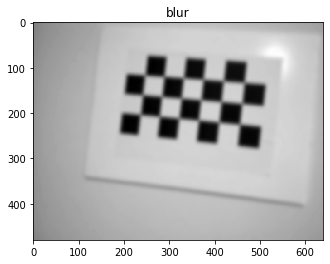

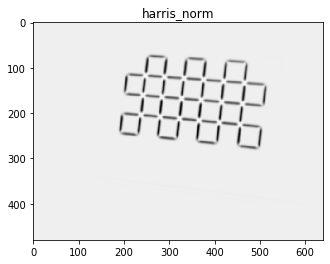

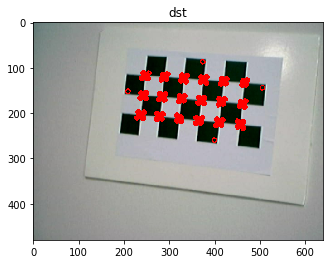

In [57]:
src = cv2.imread('../img/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(25,25),0)

harris = cv2.cornerHarris(blur, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
#min~max 구간으로 scsaling하는 함수


dst = src.copy()

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 240:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('blur', blur)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

블러시키면 시킬수록 저주파 성분 증가 -> 역치값 수정 필요  
* 역치값 자동수정
* for문 대체

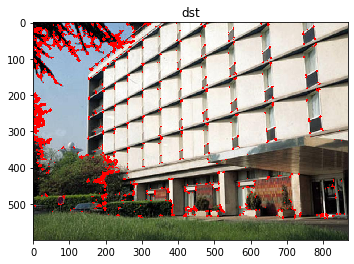

In [78]:
gray = cv2.imread('../img/building.jpg',0)
img = cv2.imread('../img/building.jpg')
dst = cv2.cornerHarris(gray, 5, 3, 0.04)

img[dst>0.01 * dst.max()] = [0,0,255]    #max값의 1%를 sensor로 쓰겠다
imshow('dst', img)

## 대응점 찾기
검출 -> 기술 -> 매칭  
* 특징점
  * 엣지 - 강도와 방향 정보만 있으므로 부적합  
  * **지역 특징** detection  
    여러 방향으로 밝기 변화가 나타나는 곳일수록 적합

* 모라벡 알고리즘 : 주변 값들과의 차이를 구해 3x3 원소 다 더함. 노이즈에 매우 민감  
-> 사이즈 상관없이 되게 만든 게 Harris

* 2차 모멘트 행렬의 고유값 분석 - Harris
  * 두 개의 고유값이 모두 0이거나 0에 가까움 -> 변화가 거의 없는 곳
  * 고유값 하나는 크고 다른 하나는 작음 -> 한 방향으로만 변화가 있는 엣지
  * 고유값 두 개가 모두 큼 -> 여러 방향으로 변화가 있는 포인트. 특징점으로 적합

* 큰 값이 밀집되어 보임 -> 대표점 선택 필요


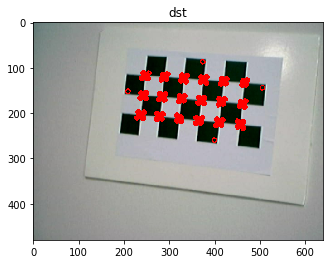

In [80]:
src = cv2.imread('../img/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(25,25),0)

harris = cv2.cornerHarris(blur, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


dst = src.copy()

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 240:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('dst', dst)

### FastFeatureDetector
* Harris는 너무 느려서 실시간 영상에서는 쓸 수 없음. 복잡한 영상에서는 성능은 좋음  
* Fast가 Harris보다 20-30배 빠름,Harris corner보다 성능은 떨어짐

851


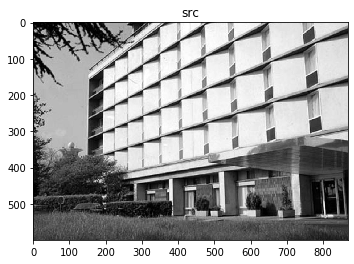

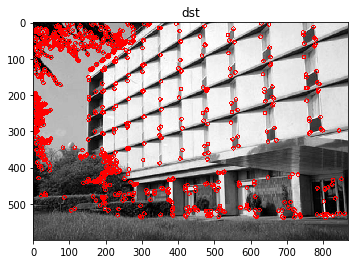

In [81]:
src = cv2.imread('../img/building.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('../img/corner.png', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)
# 작아지면 코너 많이 검출됨, 원에서도 검출되지만 중첨되서 검출될수 있음. like threshold.
keypoints = fast.detect(src)
print(len(keypoints))
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

In [ ]:
src = cv2.imread('../img/chessboard.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)
# 작아지면 코너 많이 검출됨, 원에서도 검출되지만 중첨되서 검출될수 있음. like threshold.
keypoints = fast.detect(src)
print(len(keypoints)) #특징점 갯수

In [90]:
print(keypoints[0])
print(keypoints[0].pt)  # 검출한 첫번째 코너포인트 좌표. tuple type.
x = keypoints[0].pt[0]
y = keypoints[0].pt[1]
print(x,y)

x, y = keypoints[0].pt
print(x,y)

<KeyPoint 0000019F48126B10>
(254.0, 75.0)
254.0 75.0
254.0 75.0


92


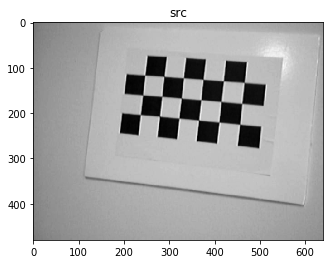

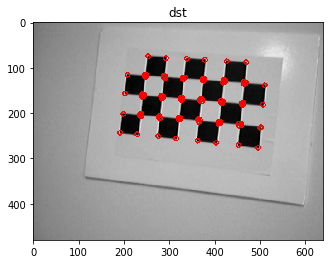

In [85]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

In [91]:
cv2.imwrite("out.png", dst)

True

## Corner point 갯수 정확히 찾기
위 마커는 겹친 부분이 많음  
블록 크기를 작게 보면 코너가 많이 나타날 수도.  
가까운 마커는 하나로 합치자  
  
* 방법  
점을 바이너리 존으로 가져와서 -> 점을 뻥튀기 -> 점 뭉침 -> contour 따서 center point 찾기  
  
* momoent  
m00 : 면적 (binary image에서는 점의 개수와 동일)  
m10 : x축 값의 합  
m01 : y축 값의 합  

(480, 640)


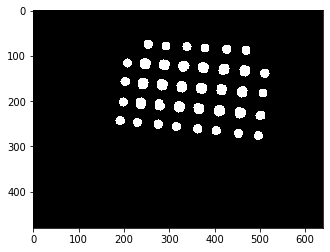

In [99]:
mask = np.zeros(src.shape, dtype='uint8')
print(mask.shape)

# drawing key point
for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(mask, pt, 10, (255, 255, 255), -1)  # -1:fill , 너무크면 옆 점이랑 붙어서 안 돼

imshow("",mask)

38


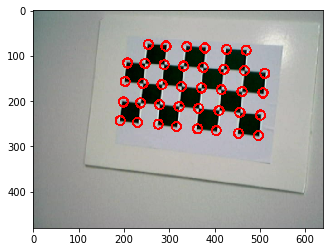

In [103]:
contours, _ = cv2.findContours(mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))  #38 (정확한 points)

src = cv2.imread('../img/chessboard.jpg')
points=[]
for con in contours :
    M = cv2.moments(con, True)    #폐곡선으로 만들어라
    cx = int(M['m10'] / M['m00'] )
    cy = int(M['m01'] / M['m00'] )
    cv2.circle(src, (cx,cy), 10, (0,0,255),3)
    points.append([cx,cy])

imshow("",src)


In [107]:
print(points)  #38개의 점 / 정렬 안 되어 있음

[[497, 276], [453, 271], [404, 265], [363, 261], [316, 256], [276, 251], [230, 247], [192, 243], [502, 231], [456, 225], [410, 221], [365, 216], [322, 212], [279, 208], [237, 204], [199, 202], [507, 182], [461, 179], [415, 175], [371, 171], [327, 168], [284, 164], [242, 161], [203, 157], [511, 139], [466, 133], [421, 130], [375, 126], [332, 123], [289, 120], [208, 116], [247, 117], [470, 88], [427, 86], [379, 83], [339, 80], [293, 79], [254, 75]]


# 과제) 2차원 array 정렬
sorting 함수 중에 key를 1열이나 2열 각각으로 소팅 가능  
복합적으로 소팅  
lambda expectation으로  
처음에 2열로 정렬 -> x축 정렬

원의 크기가 달라 -> perspective effect 존재

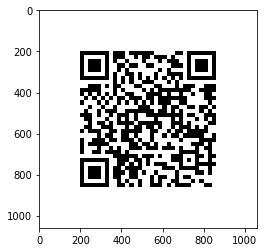

In [110]:
# QR코드 코너포인트 찾기 - FAST
src = cv2.imread('../img/acronet.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(50)
keypoints = fast.detect(gray)

# drawing key point
for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(src, pt, 5, (0, 0, 255), 2)

imshow("",src)

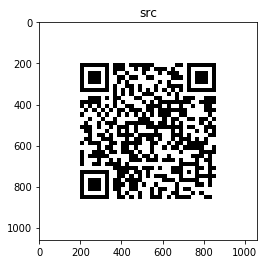

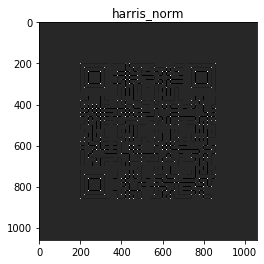

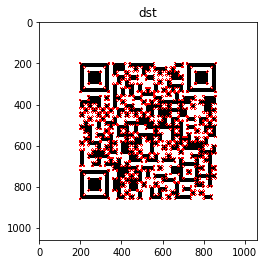

In [113]:
# QR코드 코너포인트 찾기 - Harris Corner Detection
src = cv2.imread('../img/acronet.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

harris = cv2.cornerHarris(gray, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = src.copy()
for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

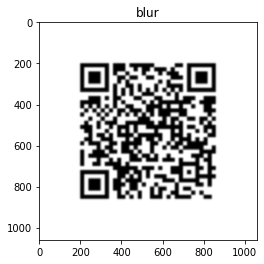

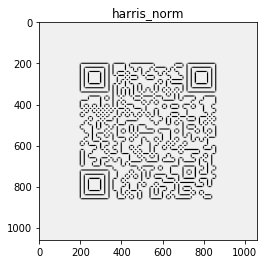

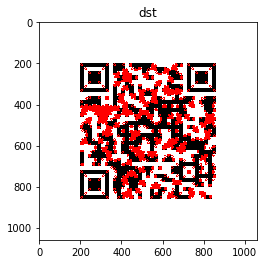

In [117]:
# 블러 후 QR코드 코너포인트 찾기
src = cv2.imread('../img/acronet.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(25,25),0)

harris = cv2.cornerHarris(blur, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = src.copy()
for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 245:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('blur', blur)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

## QR Code Drawing
글자수 적을수록 단순함  
인식) 모서리 3개 점 -> 디코딩  
opencv 4.0부터 qr코드 인식 기본 탑재

https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8
[[[ 50.      50.    ]]

 [[578.9867  50.    ]]

 [[586.     579.    ]]

 [[ 50.     579.    ]]]


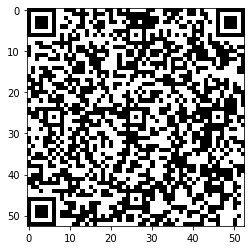

In [136]:
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 10,
     border = 5)
#url = 'http://www.naver.com'
url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8'
qr.add_data(url)
qr.make()

img = qr.make_image(fill_color="black", back_color="white") #색상 줄 필요 없. 어차피 binarization

plt.imshow(img, cmap="gray")

img.save("qrcode.png")

image = cv2.imread("qrcode.png")
qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)  #return값 3개
print(data)
print(bbox)
imshow("", rectifiedImage)

In [141]:
image = cv2.imread("../../../20200114_142039.jpg")
qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)  #return값 3개
print(data[:8])
print(bbox)

C1900000
[[[ 428.      198.    ]]

 [[2601.      204.    ]]

 [[2469.8967 2341.661 ]]

 [[ 487.     2276.    ]]]


* QR Code 이미지 일부를 지우면 못 읽음


[[[200.      200.     ]]

 [[858.97565 200.     ]]

 [[867.      859.     ]]

 [[200.      859.     ]]]


AttributeError: 'NoneType' object has no attribute 'shape'

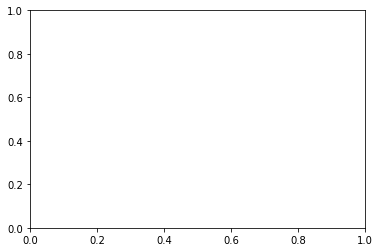

In [138]:
image = cv2.imread("../img/acronet2.png")
qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)  #return값 3개
print(data)
print(bbox)
imshow("", rectifiedImage)

* 작은 영역이 손상되어도 읽음

http://www.acronet.kr/24987
[[[200.      200.     ]]

 [[858.97565 200.     ]]

 [[867.      859.     ]]

 [[200.      859.     ]]]


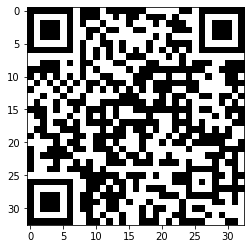

In [139]:
image = cv2.imread("../img/acronet3.png")
qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)  #return값 3개
print(data)
print(bbox)
imshow("", rectifiedImage)

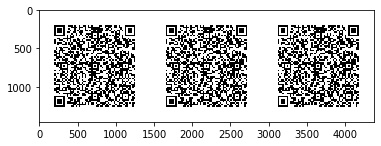

In [123]:

img = cv2.imread("../img/qrcode.png")
img = np.hstack([img, img, img])
cv2.imwrite("3.png", img)
imshow("", img)